In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Data Collection

In [78]:
df=pd.read_excel("premiums_rest.xlsx")

df.head()

df['genetical_risk']=0

# Data Manipulation

### changing the column names for linearity

In [79]:
print(df.shape)

df.columns=df.columns.str.replace(' ','_').str.lower()

print(df.columns)

(29904, 14)
Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')


### checking for null values

In [80]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

## dropping the null values

In [81]:
df.dropna(inplace=True)
print(df.shape)
print(df.isna().sum())

(29886, 14)
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64


### checking for duplicate values and dropping them

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

# quick stats

In [84]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


### the above stats you can observe that the max age is 356 and the min of the number of dependencies is less than zero so we need to clean that part of the data 

### the no of dependants which are negative are 72 records

In [85]:
df[df.number_of_dependants<0].shape

(50, 14)

### making the negative values positive for the current being

In [86]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

## box plot for all the numeric columns

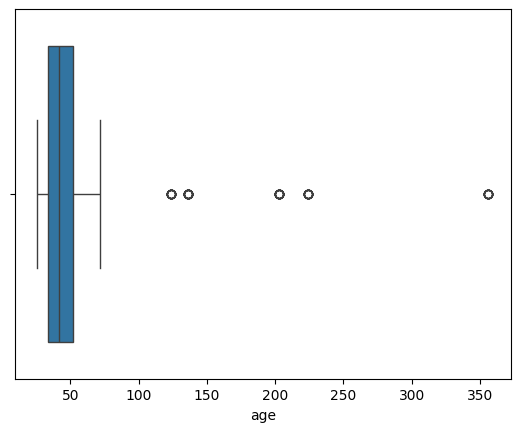

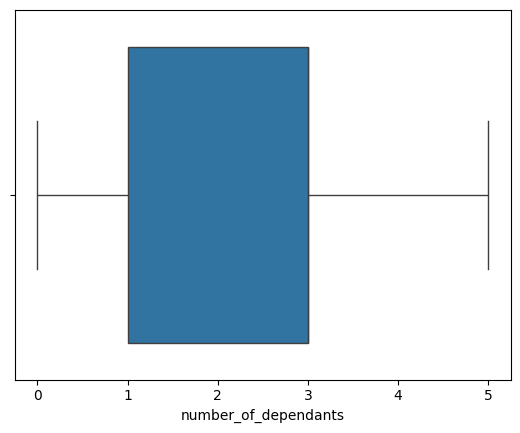

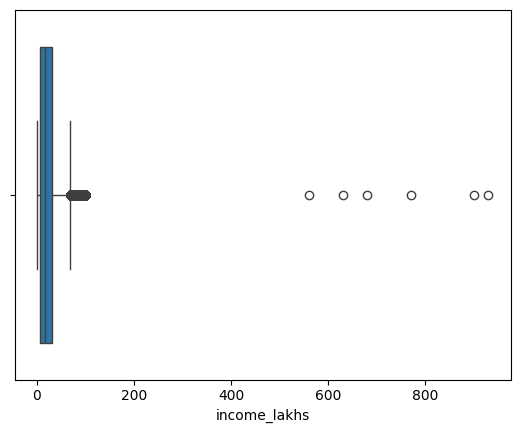

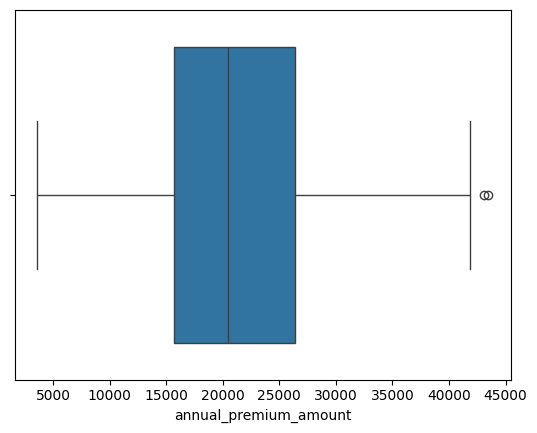

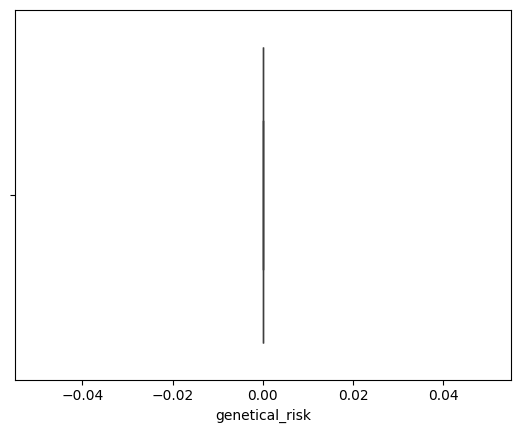

In [87]:
numeric_columns=df.select_dtypes(['float64','int64']).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

## for getting the ages correct we will drop all the rows which has age >100 and here .copy() is for a deep copy not a shallow copy

In [88]:
df1=df[df.age<=100].copy()
df1['age'].describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

## for detecting and treating the outliers in the income in lakhs columns we will use the iqr method 

In [89]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

### ater calculating the iqr bounds lets just manually take a threshold like 0.999 quantile and then use that threshold for removing the outliers

In [90]:
def iqr(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

iqr(df1.income_lakhs)

quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [91]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.income_lakhs.describe()

count    29822.000000
mean        23.226343
std         22.455408
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        100.000000
Name: income_lakhs, dtype: float64

# plotting the histogram for all the numeric columsn

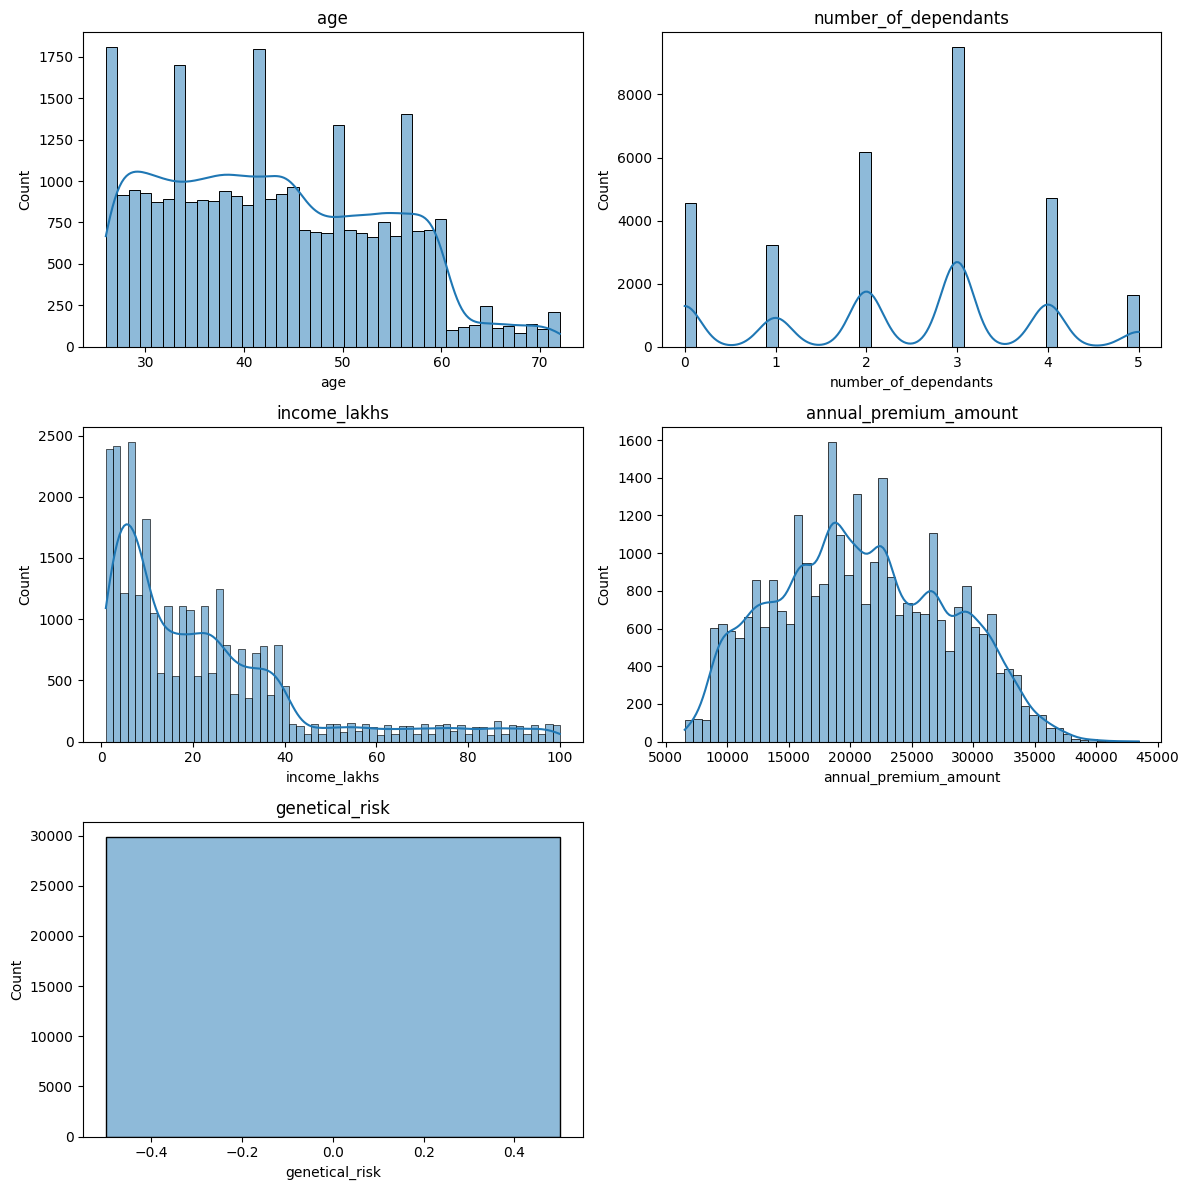

In [92]:
import math
n = len(numeric_columns)
rows = math.ceil(n / 2)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [93]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


# plotting scatter for the bivariate analysis

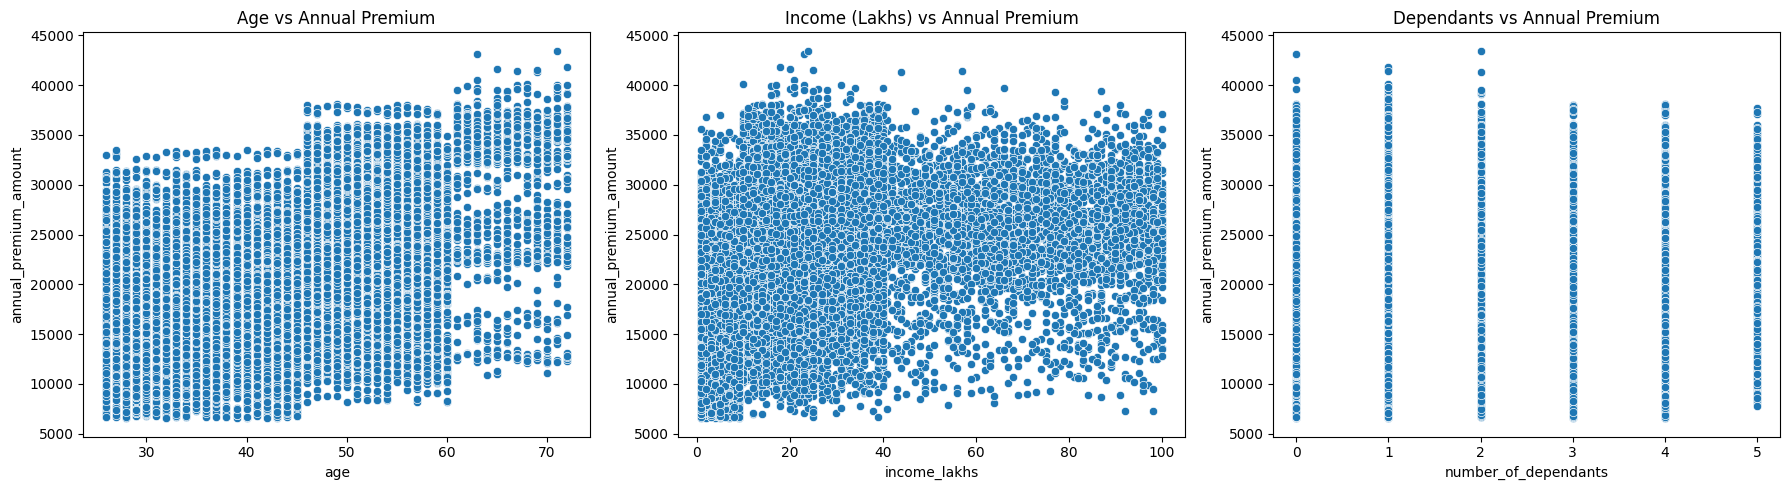

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=df2,
    x="age",
    y="annual_premium_amount",
    ax=axes[0]
)
axes[0].set_title("Age vs Annual Premium")

sns.scatterplot(
    data=df2,
    x="income_lakhs",
    y="annual_premium_amount",
    ax=axes[1]
)
axes[1].set_title("Income (Lakhs) vs Annual Premium")

sns.scatterplot(
    data=df2,
    x="number_of_dependants",
    y="annual_premium_amount",
    ax=axes[2]
)
axes[2].set_title("Dependants vs Annual Premium")


plt.tight_layout()
plt.show()


# Categorical Analysis

In [95]:
categorical_columns=df.select_dtypes(['object']).columns
print(categorical_columns)

for col in categorical_columns:
    print(f"col:{col} values:{df[col].unique()}\n")


Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')
col:gender values:['Male' 'Female']

col:region values:['Northwest' 'Southeast' 'Northeast' 'Southwest']

col:marital_status values:['Unmarried' 'Married']

col:bmi_category values:['Normal' 'Obesity' 'Overweight' 'Underweight']

col:smoking_status values:['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']

col:employment_status values:['Salaried' 'Self-Employed' 'Freelancer']

col:income_level values:['<10L' '10L - 25L' '> 40L' '25L - 40L']

col:medical_history values:['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']

col:insurance_plan values:['Bronze' 'Silver' 'Gold']



# Changing the column names 

In [96]:
df2['smoking_status'].replace(
    {
      'Smoking=0':"No Smoking",
      'Does Not Smoke':"No Smoking",
      "Not Smoking":"No Smoking"
    },
    inplace=True
)

df2['smoking_status'].unique()

/tmp/ipykernel_297980/2424388232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [97]:
pd_ct=df2['gender'].value_counts(normalize=True)
pd_ct

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

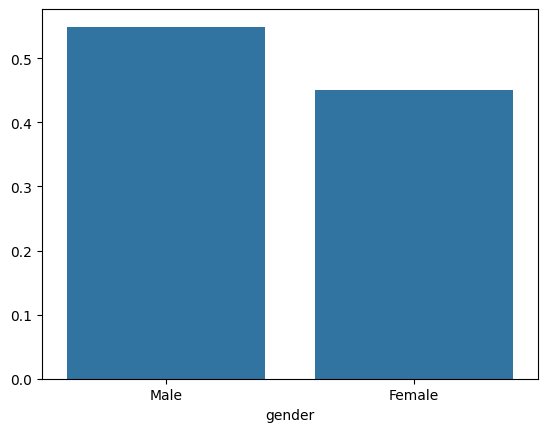

In [98]:
sns.barplot(x=pd_ct.index,y=pd_ct.values)
plt.show()

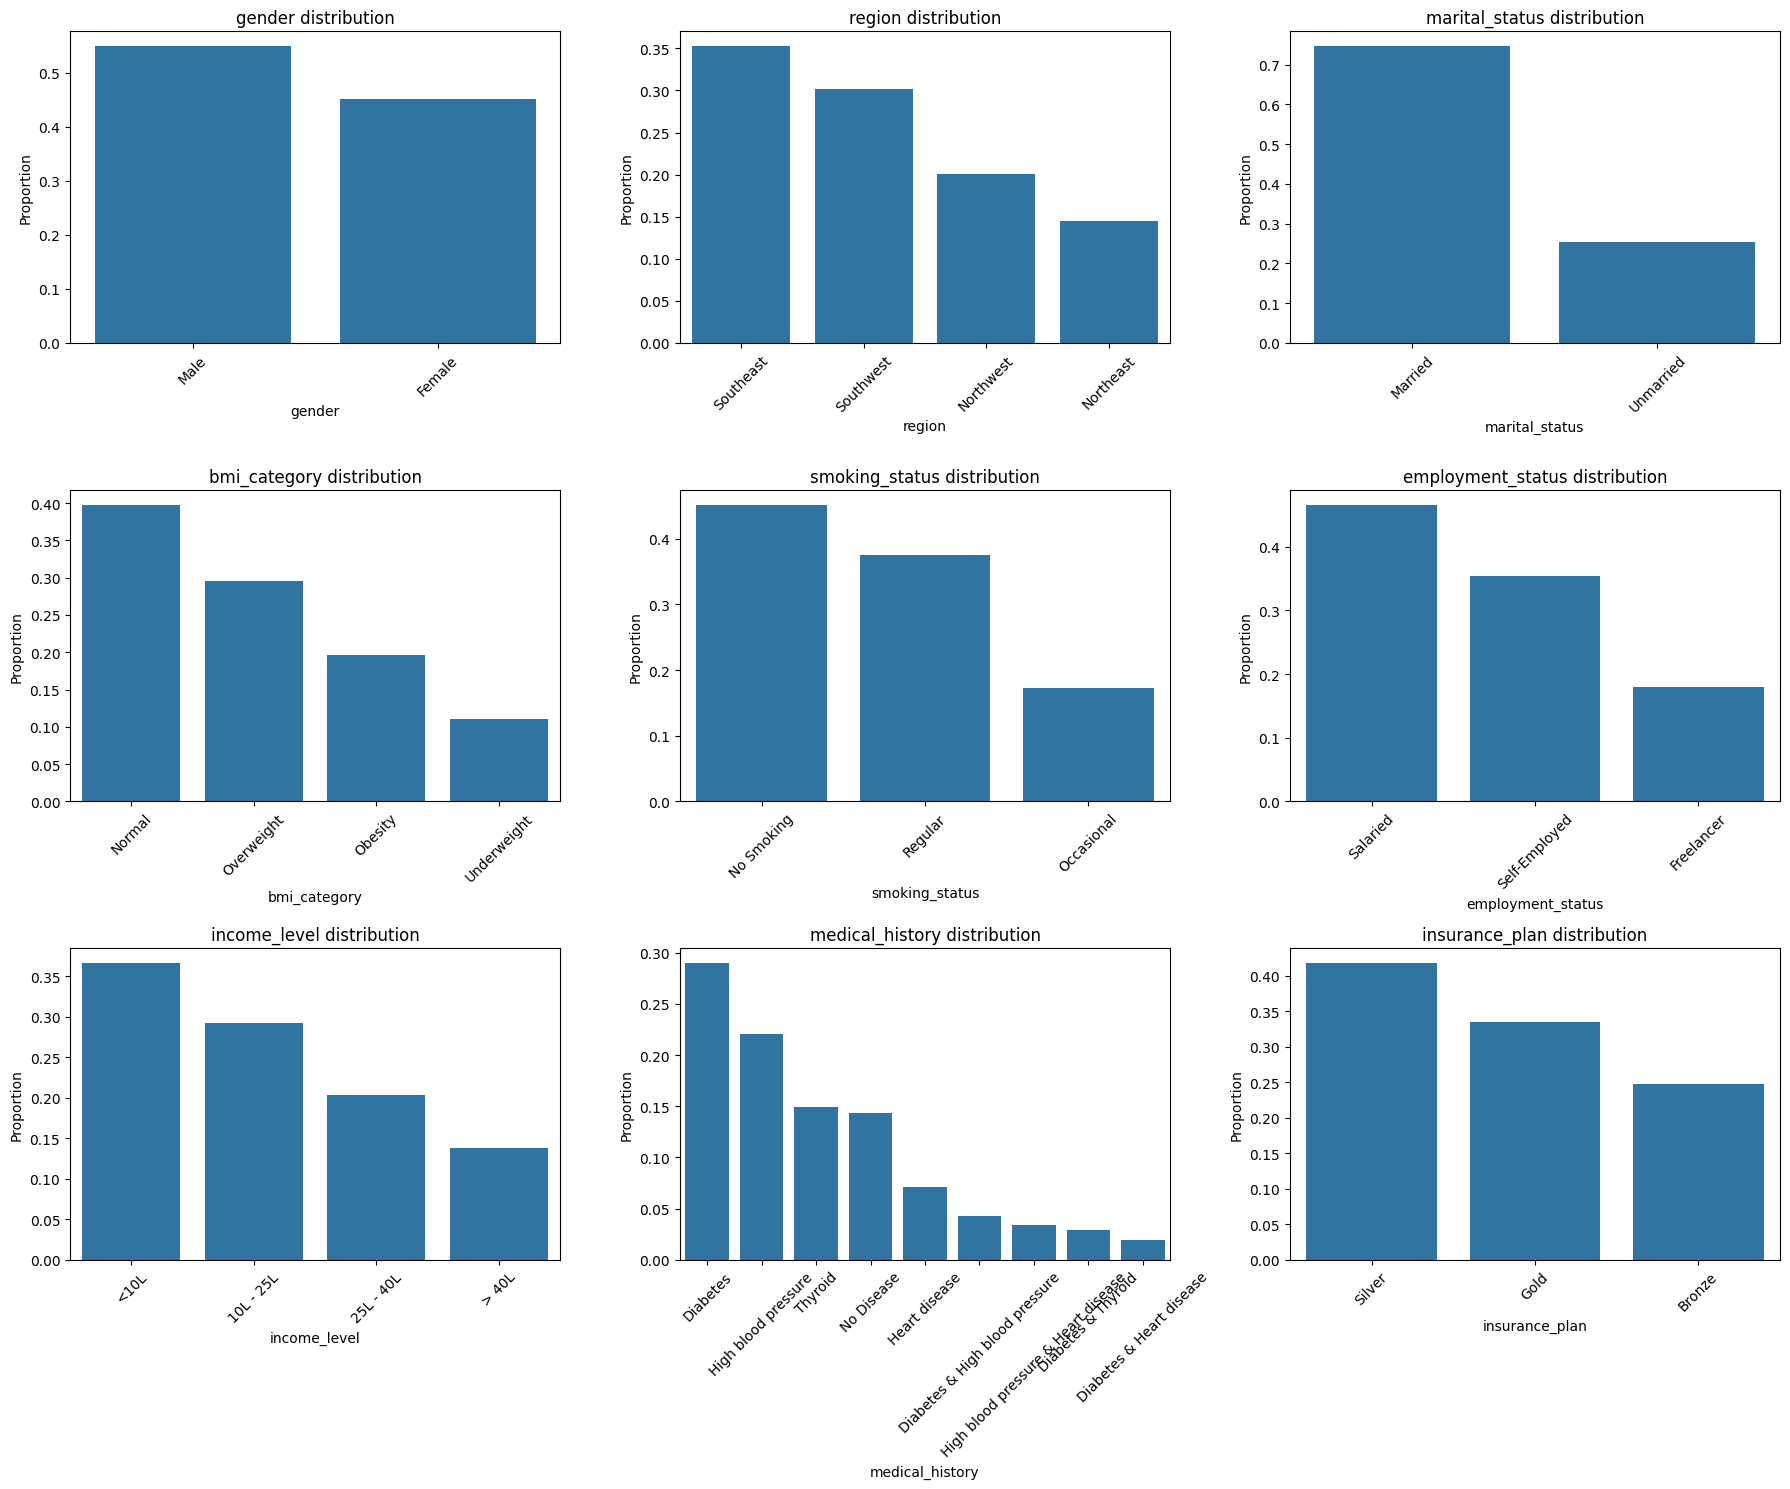

In [99]:
categorical_cols = [
    'gender',
    'region',
    'marital_status',
    'bmi_category',
    'smoking_status',
    'employment_status',
    'income_level',
    'medical_history',
    'insurance_plan'
]

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    pd_ct = df2[col].value_counts(normalize=True)

    sns.barplot(
        x=pd_ct.index,
        y=pd_ct.values,
        ax=axes[i]
    )

    axes[i].set_title(f"{col} distribution")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


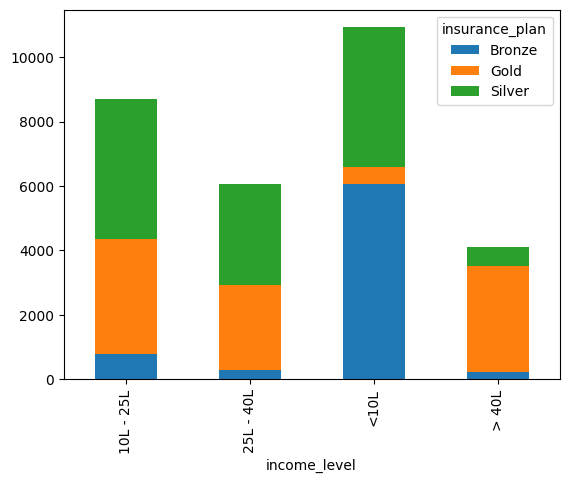

In [100]:
cross_plan=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(cross_plan)


cross_plan.plot(kind="bar",stacked=True)
plt.show()


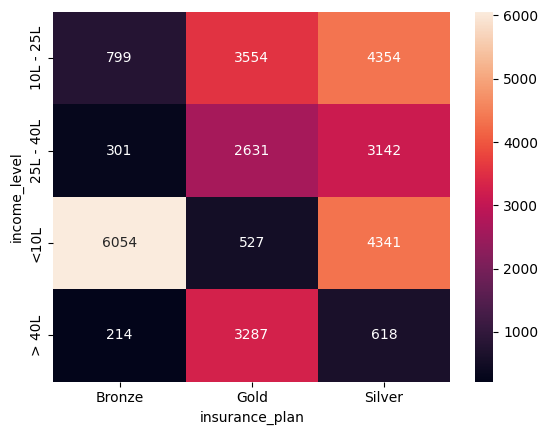

In [101]:
sns.heatmap(cross_plan,annot=True,fmt='d')
plt.show()

In [102]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


# feature engineering

In [103]:
df2['medical_history'].unique()

risk_scores={
     "diabetes":6,
      "heart disease":8,
      "high blood pressure":6,
      "thyroid":5,
      "no disease":0,
      "none":0
}

df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ",expand=True).apply(lambda x:x.str.lower())

df2.head()

print(df2['disease1'].unique())
df2['disease2'].unique()

['diabetes' 'high blood pressure' 'no disease' 'thyroid' 'heart disease']


array([None, 'high blood pressure', 'heart disease', 'thyroid'],
      dtype=object)

In [104]:
df2.loc[:, ['disease1', 'disease2']] = df2[['disease1','disease2']].fillna("none")


df2['total_risk_score']=0

for disease in ['disease1','disease2']:
     df2['total_risk_score']+=df2[disease].map(risk_scores)
    
min_score=df2['total_risk_score'].min()
max_score=df2['total_risk_score'].max()

df2['normalized_risk_score']=((df2['total_risk_score']-min_score)/(max_score-min_score))
df2.sample(15)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
21861,51,Male,Northeast,Unmarried,1,Normal,Regular,Salaried,10L - 25L,14,No Disease,Bronze,11992,0,no disease,none,0,0.000000
24581,49,Male,Southwest,Married,2,Underweight,Regular,Self-Employed,<10L,9,Thyroid,Gold,29589,0,thyroid,none,5,0.357143
6005,61,Male,Southwest,Married,1,Overweight,No Smoking,Self-Employed,10L - 25L,16,Diabetes & Thyroid,Gold,36514,0,diabetes,thyroid,11,0.785714
24853,49,Female,Southwest,Married,3,Normal,No Smoking,Salaried,10L - 25L,16,High blood pressure,Gold,26786,0,high blood pressure,none,6,0.428571
16061,36,Female,Southeast,Married,4,Normal,No Smoking,Salaried,<10L,4,Diabetes,Bronze,9489,0,diabetes,none,6,0.428571
21987,58,Female,Southwest,Married,3,Obesity,No Smoking,Freelancer,<10L,5,High blood pressure,Silver,22703,0,high blood pressure,none,6,0.428571
23460,37,Female,Southwest,Unmarried,0,Overweight,Occasional,Self-Employed,25L - 40L,38,Thyroid,Gold,24711,0,thyroid,none,5,0.357143
8457,60,Female,Southeast,Married,5,Normal,Regular,Self-Employed,25L - 40L,27,Diabetes,Gold,29723,0,diabetes,none,6,0.428571
7845,40,Male,Northeast,Married,3,Normal,Regular,Freelancer,<10L,5,High blood pressure,Bronze,12029,0,high blood pressure,none,6,0.428571
2588,57,Female,Southwest,Married,3,Normal,Occasional,Self-Employed,<10L,2,High blood pressure,Silver,20056,0,high blood pressure,none,6,0.428571


In [105]:
df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":0,"Silver":1,"Gold":2})

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,0,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,0,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,1,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,2,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,0,15610,0,diabetes,none,6,0.428571


In [106]:
df2['income_level']=df2['income_level'].map({'<10L':0,'10L - 25L':1,"> 40L":3,"25L - 40L":2})

df2['income_level'].unique()

array([0, 1, 3, 2])

In [107]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,0,6,Diabetes,0,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,0,6,Diabetes,0,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,1,20,High blood pressure,1,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,2,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,1,14,Diabetes,0,15610,0,diabetes,none,6,0.428571


In [108]:
nominal_cols=['gender','region','marital_status','bmi_category','smoking_status','employment_status']

df3=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,0,6,Diabetes,0,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,0,6,Diabetes,0,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,1,20,High blood pressure,1,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,2,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,1,14,Diabetes,0,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [109]:
df3.drop(['medical_history','disease1','disease2'],axis=1,inplace=True)

In [110]:
df3.drop('total_risk_score',axis=1,inplace=True)

In [111]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,0,6,0,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,0,6,0,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,1,20,1,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,2,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,1,14,0,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


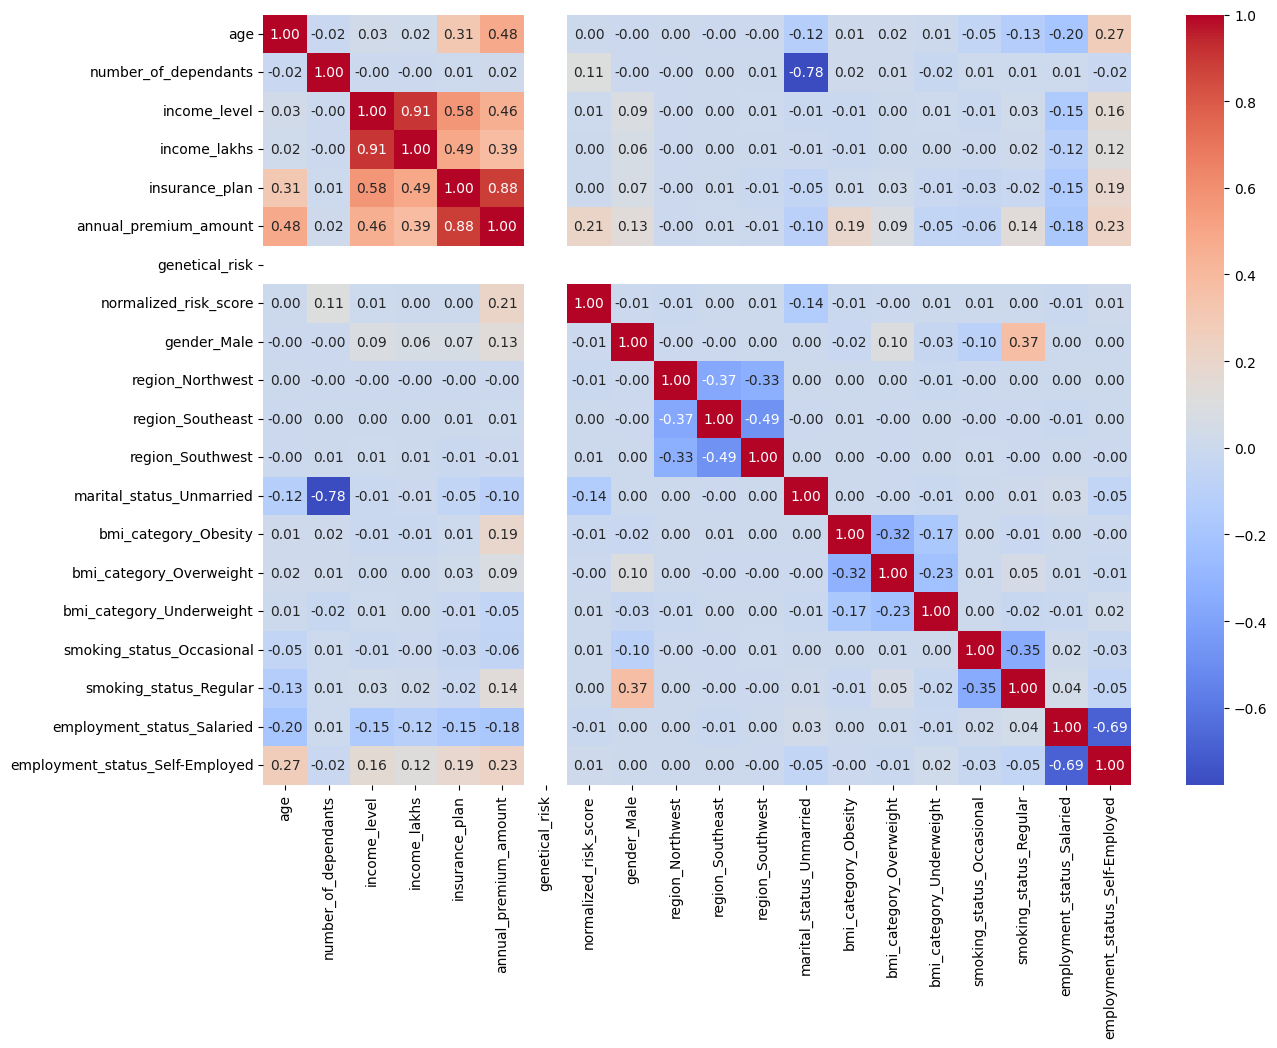

In [112]:
crr=df3.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(crr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [113]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,0,6,0,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,0,6,0,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,1,20,1,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,2,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,1,14,0,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols_scale=['age','income_lakhs','number_of_dependants','insurance_plan','income_level','genetical_risk']

X=df3.drop("annual_premium_amount",axis=1)
y=df3['annual_premium_amount']

X[cols_scale]=scaler.fit_transform(X[cols_scale])

In [115]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['variable']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

/home/anjan/mlp-1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variable,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [117]:
calculate_vif(X.drop('income_level',axis=1))

/home/anjan/mlp-1/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variable,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [118]:
X_final=X.drop('income_level',axis=1)

# MODEL TRAINING AND FINE TUNING

In [119]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=42)

print(f"X train shape:{X_train.shape}")
print(f"X train shape:{X_test.shape}")
print(f"X train shape:{y_train.shape}")
print(f"X train shape:{y_test.shape}")


X train shape:(20875, 18)
X train shape:(8947, 18)
X train shape:(20875,)
X train shape:(8947,)


In [120]:
model=LinearRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
train_score,test_score

(0.9530815646744318, 0.9546117251336064)

In [121]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
5495,0.021739,0.8,0.838384,1.0,0.0,0.785714,1,0,0,1,0,1,0,0,0,1,1,0
582,0.695652,0.8,0.000000,0.5,0.0,1.000000,0,0,1,0,0,1,0,0,0,0,0,1
281,0.195652,0.8,0.252525,0.5,0.0,0.428571,0,0,1,0,0,0,1,0,0,0,1,0
15443,0.152174,0.0,0.252525,0.5,0.0,0.428571,0,0,1,0,1,0,0,1,0,1,0,1
24281,0.695652,1.0,0.282828,1.0,0.0,0.357143,0,0,1,0,0,1,0,0,0,1,0,1


In [122]:
print(model.intercept_)

model.coef_

5923.857616247924


array([ 7.01439497e+03, -1.24779338e+03, -7.48504739e+02,  1.48400763e+04,
        6.82121026e-13,  6.02914743e+03,  4.27658037e+01, -7.61656567e+01,
       -2.50833169e+01, -5.33377920e+01, -7.02171931e+02,  3.93046263e+03,
        1.99907429e+03,  5.98455259e+02,  8.55180317e+02,  2.81679153e+03,
       -7.34601338e+01,  2.48754208e+02])

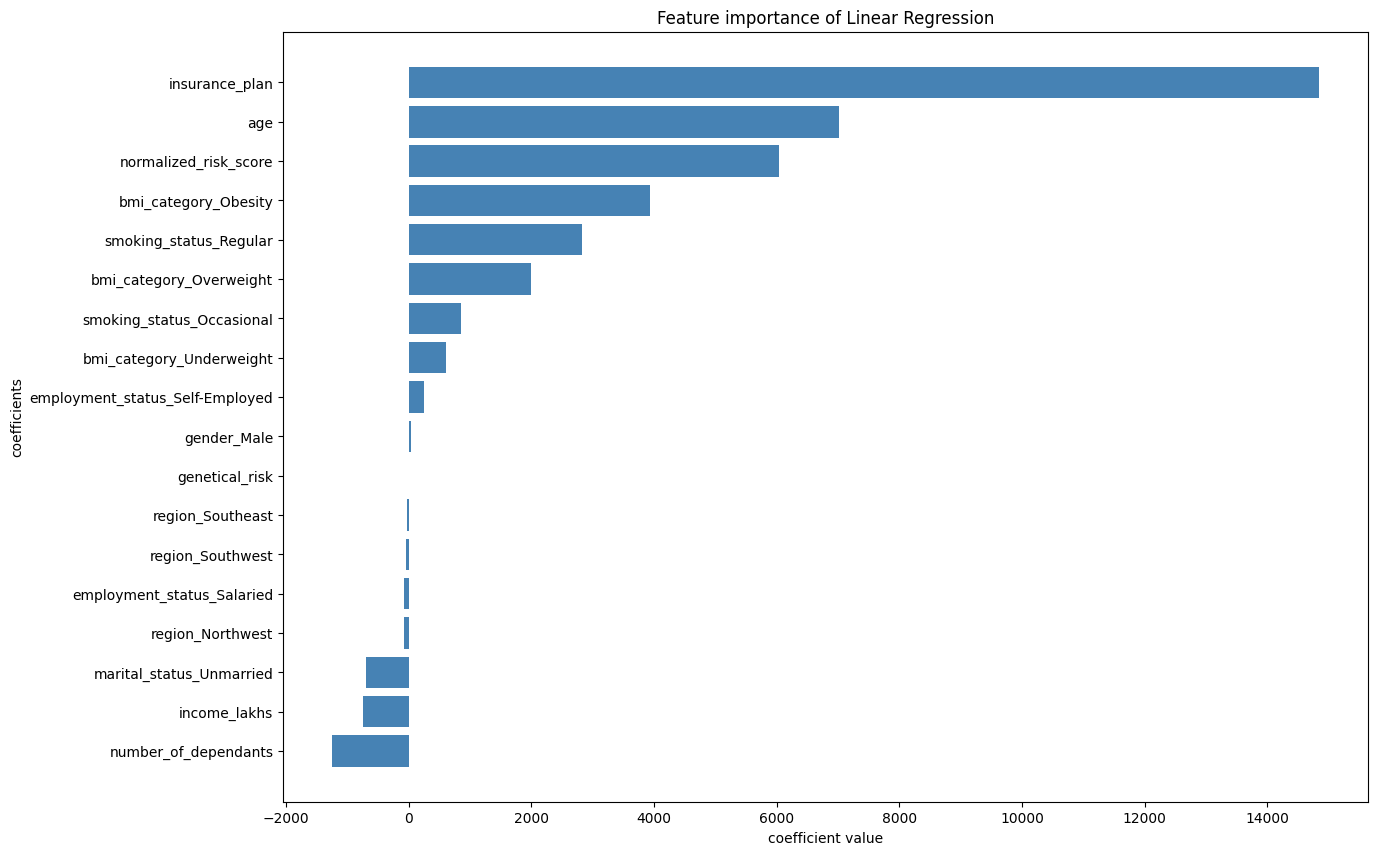

,Coeffiecients
number_of_dependants,-1.247793e+03
income_lakhs,-7.485047e+02
marital_status_Unmarried,-7.021719e+02
region_Northwest,-7.616566e+01
employment_status_Salaried,-7.346013e+01
region_Southwest,-5.333779e+01
region_Southeast,-2.508332e+01
genetical_risk,6.821210e-13
gender_Male,4.276580e+01
employment_status_Self-Employed,2.487542e+02


In [123]:
feature_importance=model.coef_

coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['Coeffiecients'])
coef_df=coef_df.sort_values(by="Coeffiecients",ascending=True)



plt.figure(figsize=(14,10))
plt.barh(coef_df.index,coef_df['Coeffiecients'],color='steelblue')
plt.title("Feature importance of Linear Regression")
plt.xlabel("coefficient value")
plt.ylabel("coefficients")
plt.show()


coef_df

In [124]:
model_rg=Ridge(alpha=5)
model_rg.fit(X_train,y_train)
train_score=model_rg.score(X_train,y_train)
test_score=model_rg.score(X_test,y_test)
train_score,test_score

(0.9530773827759621, 0.9546113588026404)

In [125]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score=model_xgb.score(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score,test_score

(0.9986407160758972, 0.9980074167251587)

### mse and rmse for linear regression

In [126]:
from sklearn.metrics import mean_squared_error

y_pred=model.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->2183801.8818571903   RMSE-->1477.7692248308565



### mse and rmse for RIDGE

In [127]:
y_pred=model_rg.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->2183819.5074280063   RMSE-->1477.7751883923368



### mse and rmse for XGBRegressor

In [128]:
y_pred=model_xgb.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->95870.8515625   RMSE-->309.6301851604588



## preforming randomized search cv

In [129]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={
     "n_estimators":[20,30,40],
     "learning_rate":[0.01,0.1,0.2],
     "max_depth":[3,4,5]
}

randomS_model=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=10)
randomS_model.fit(X_train,y_train)
randomS_model.best_score_


np.float64(0.9953871170679728)

In [130]:
randomS_model.best_params_

{'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.2}

In [131]:
best_model=randomS_model.best_estimator_

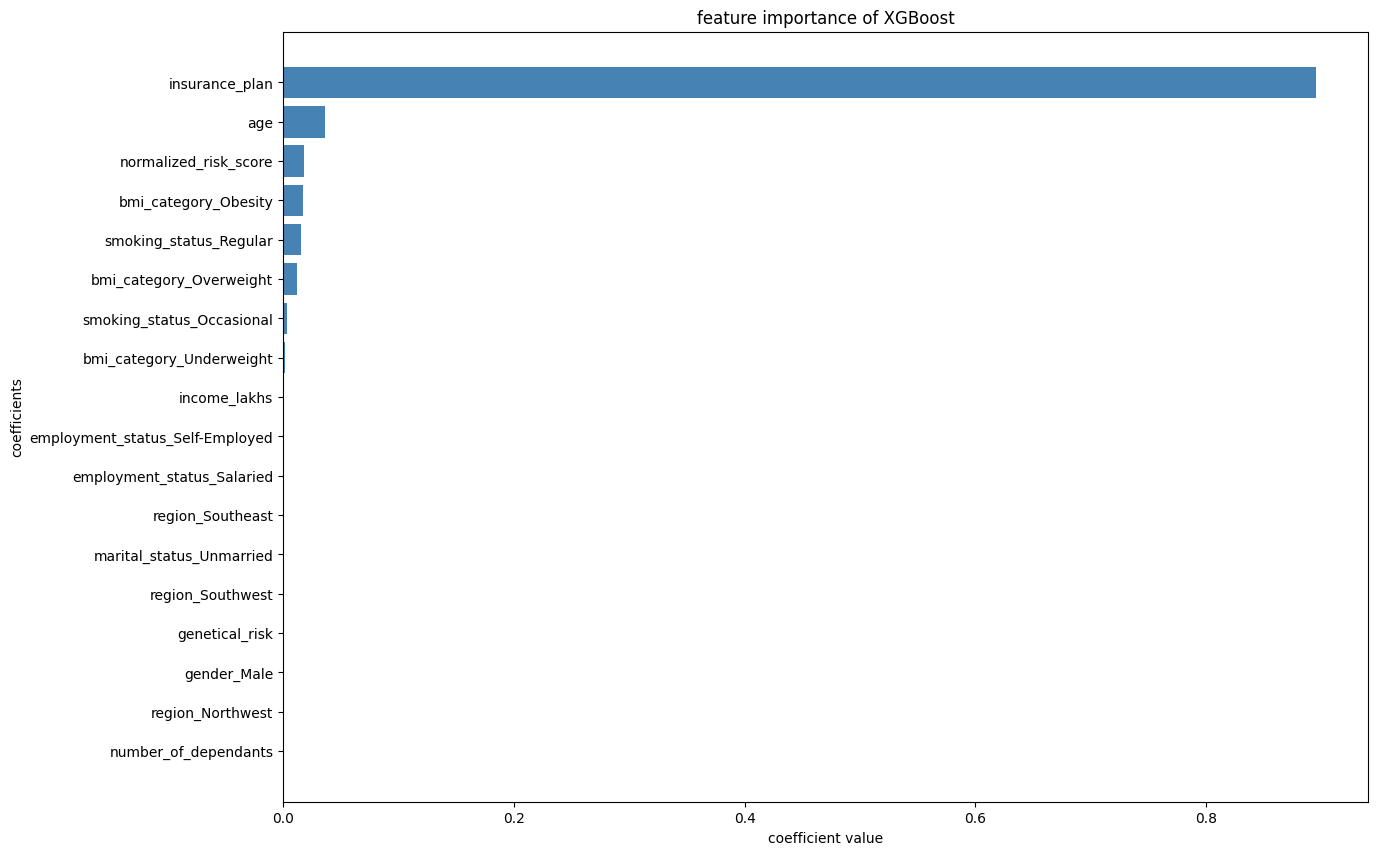

,Coeffiecients
number_of_dependants,0.000000
region_Northwest,0.000000
gender_Male,0.000000
genetical_risk,0.000000
region_Southwest,0.000000
marital_status_Unmarried,0.000000
region_Southeast,0.000000
employment_status_Salaried,0.000000
employment_status_Self-Employed,0.000000
income_lakhs,0.000010


In [132]:
feature_importance=best_model.feature_importances_

coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['Coeffiecients'])
coef_df=coef_df.sort_values(by="Coeffiecients",ascending=True)



plt.figure(figsize=(14,10))
plt.barh(coef_df.index,coef_df['Coeffiecients'],color='steelblue')
plt.title("feature importance of XGBoost")
plt.xlabel("coefficient value")
plt.ylabel("coefficients")
plt.show()

coef_df

# ERROR ANALYSIS

In [149]:
y_pred=model_xgb.predict(X_test)

residual=y_pred-y_test
residual_pct=(residual*100)/y_test

results_df=pd.DataFrame(
     {
        'actual':y_test,
        'predicted':y_pred,
        'residual':residual,
        'residual_percentage':residual_pct
   }
)

<Axes: xlabel='residual_percentage', ylabel='Count'>

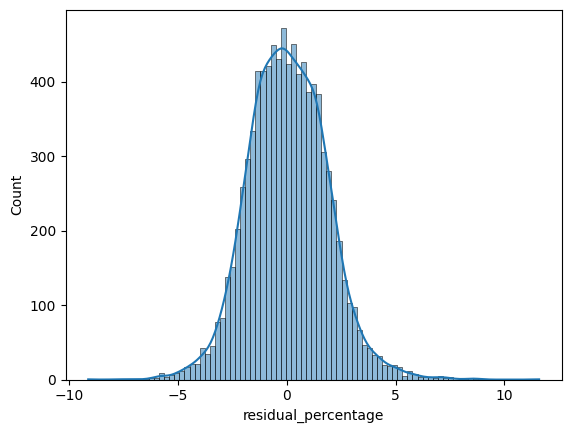

In [150]:
sns.histplot(results_df['residual_percentage'],kde=True)

In [151]:
extreme_results_df=results_df[np.abs(results_df.residual_percentage>10)]
extreme_pct=(extreme_results_df.shape[0]*100)/results_df.shape[0]

print(results_df.shape)
print(extreme_results_df.shape)

print(f"the percentage of extreme error are {extreme_pct}")

(8947, 4)
(1, 4)
the percentage of extreme error are 0.011176930814798256


In [152]:
extreme_results_df2=results_df[np.abs(results_df.residual_percentage>50)]
extreme_pct2=(extreme_results_df2.shape[0]*100)/results_df.shape[0]

print(extreme_results_df2.shape)
extreme_pct2

extreme_results_df2.sort_values(by='residual_percentage',ascending=False)

(0, 4)


,actual,predicted,residual,residual_percentage


In [153]:
extreme_errors_df=X_test.loc[extreme_results_df2.index]

extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


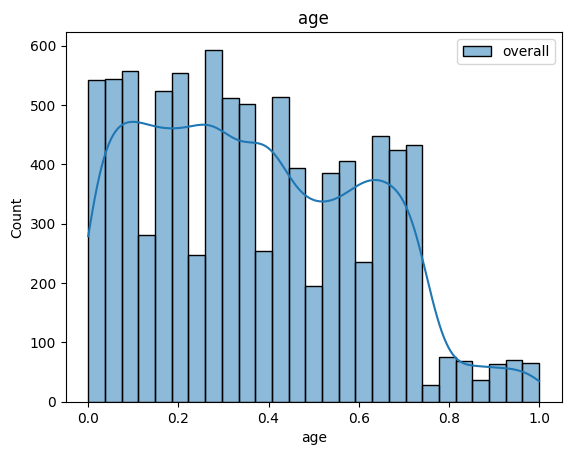

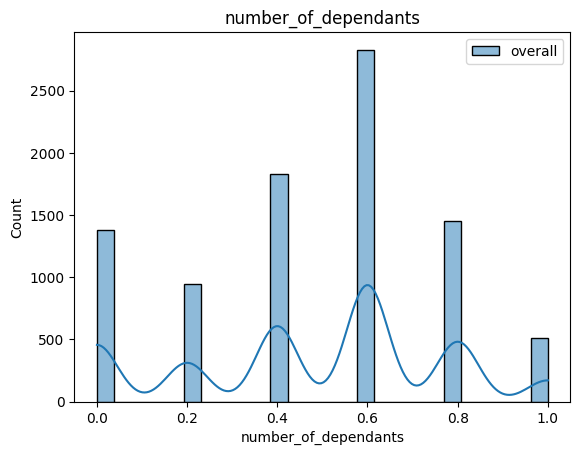

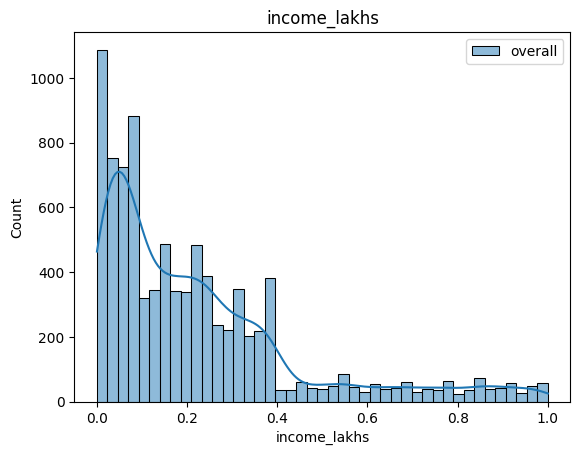

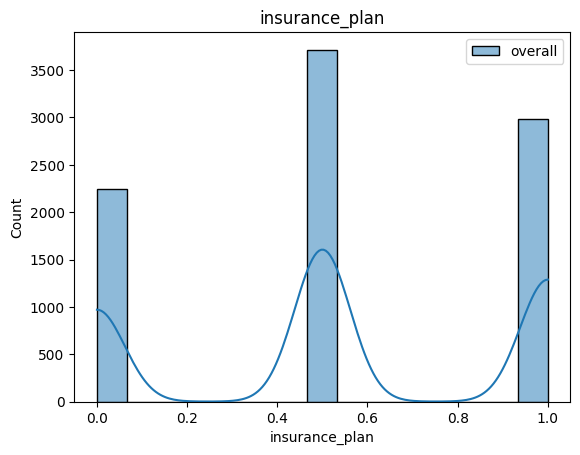

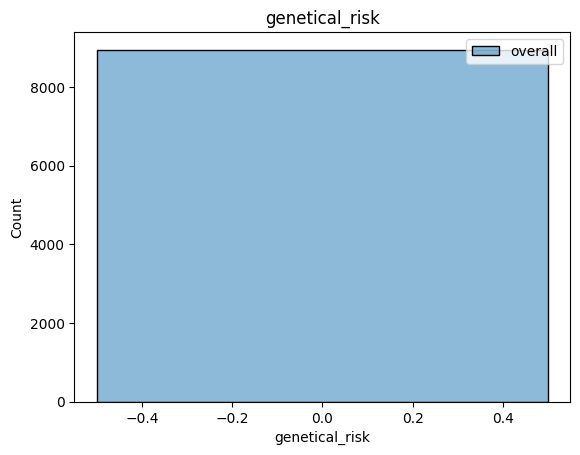

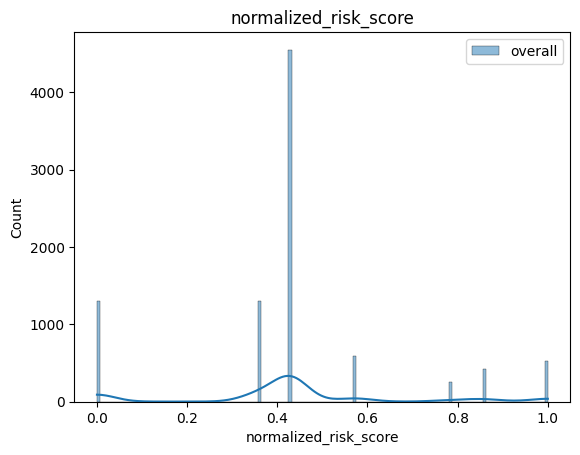

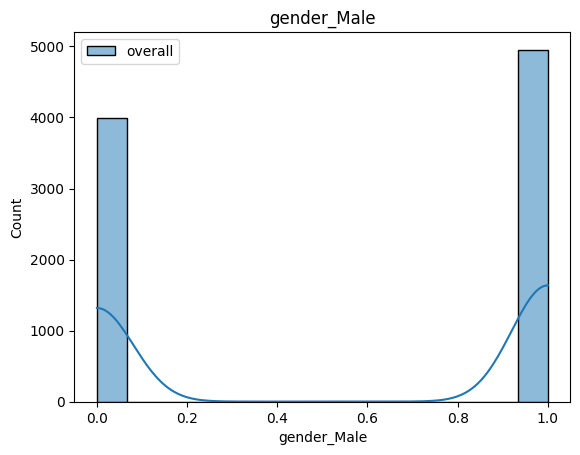

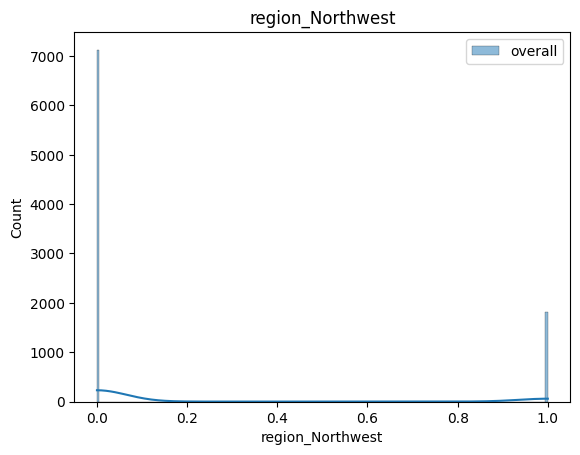

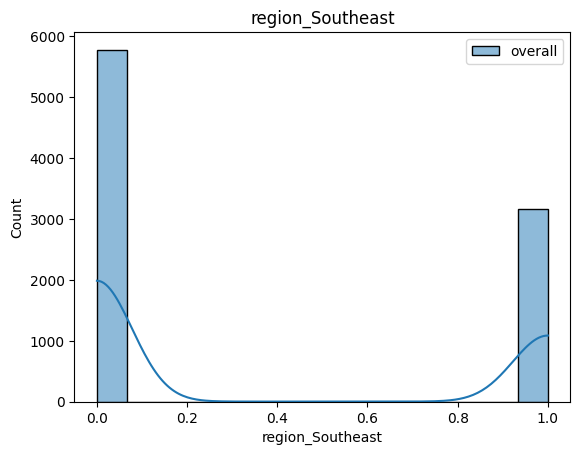

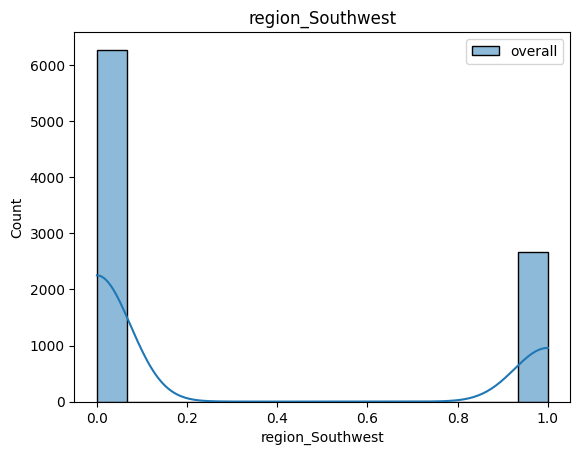

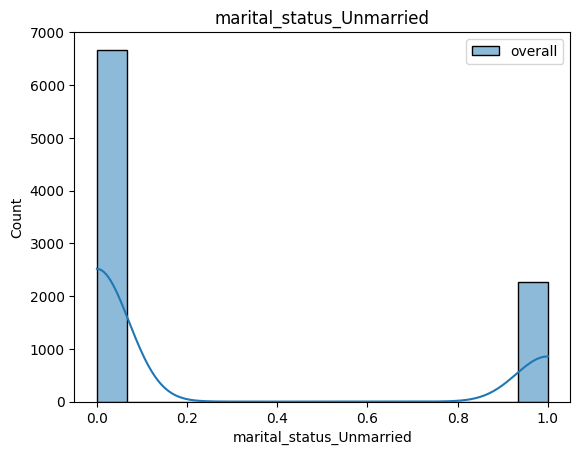

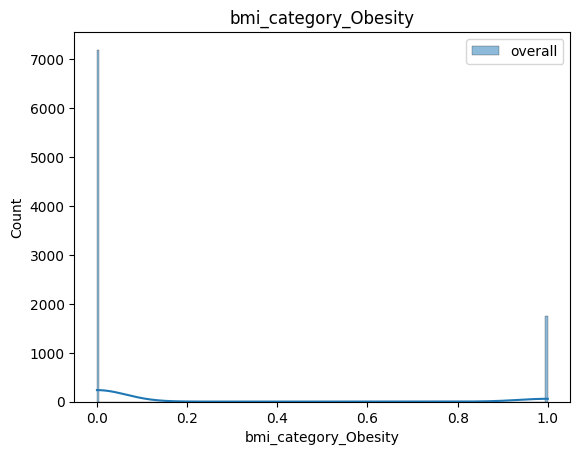

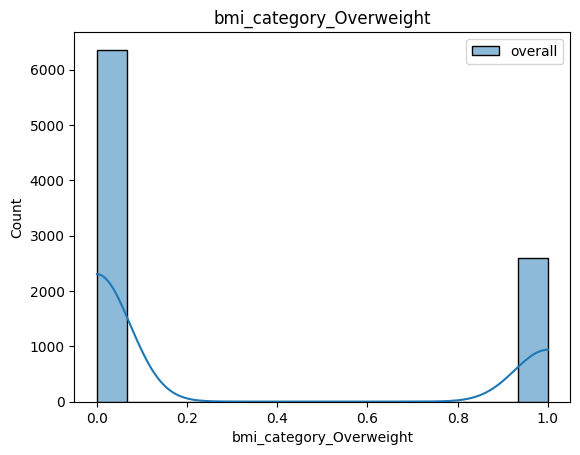

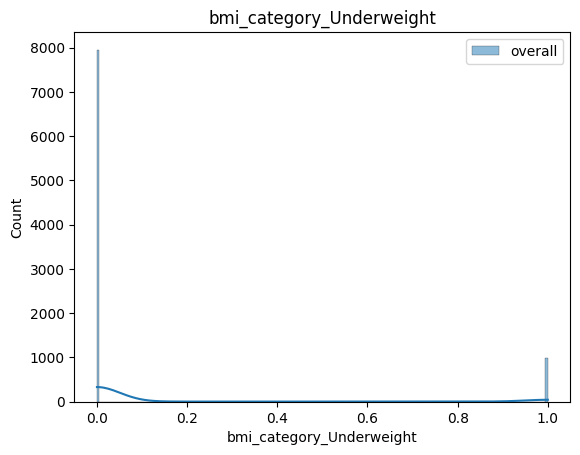

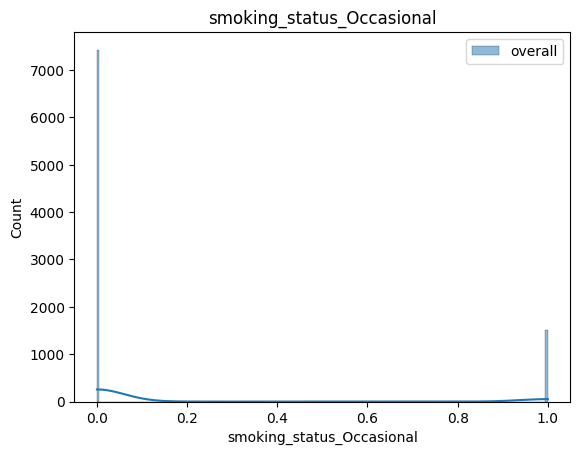

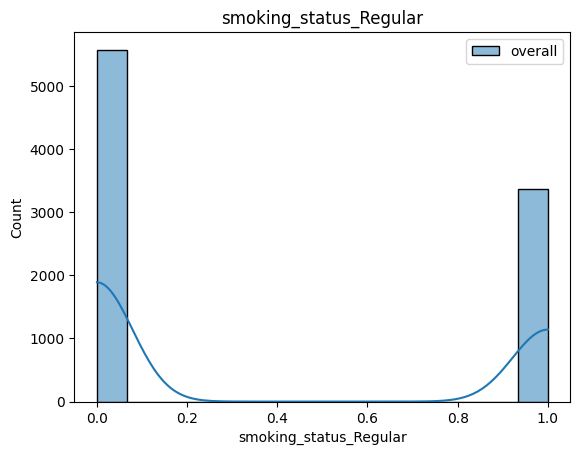

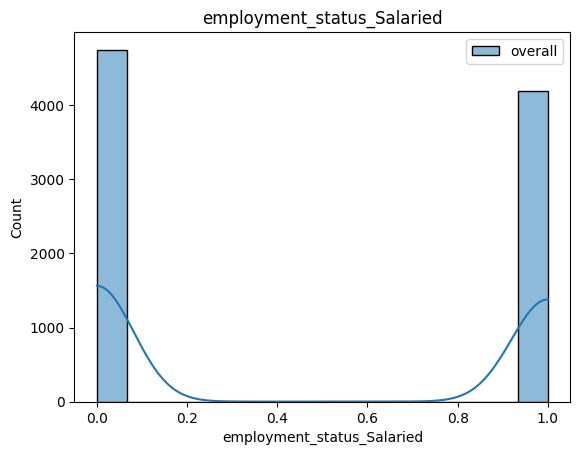

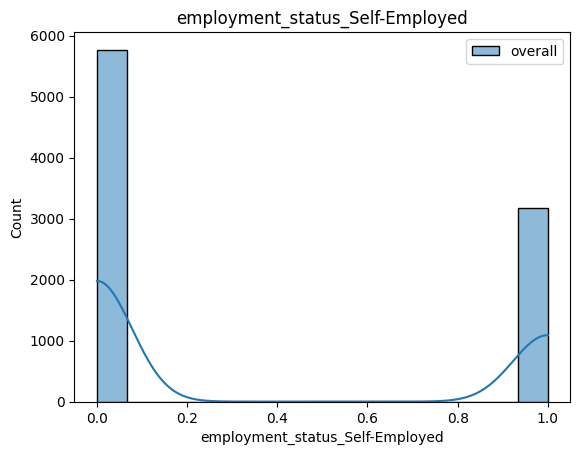

In [154]:
for feature in X_test.columns:
    sns.histplot(X_test[feature],label="overall",kde=True)
    sns.histplot(extreme_errors_df[feature],label="extreme error",kde=True)
    plt.legend()
    plt.title(f"{feature}")
    plt.show()

In [155]:
cols_scale

['age',
 'income_lakhs',
 'number_of_dependants',
 'insurance_plan',
 'income_level',
 'genetical_risk']

In [156]:
extreme_errors_df['income_level']=-1
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,income_level


## the randomsearch cv model is giving around 97 score and the normal model_xbg is giving 98 so i am choosing the normal one 

In [158]:
best_model=model_xgb

# saving the model

In [159]:
from joblib import dump

dump(best_model,'artifacts/model_rest.joblib')

['artifacts/model_rest.joblib']

In [160]:
scaler_with_cols={
    'scaler':scaler,
    'cols_to_scale':cols_scale,
}

scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'income_lakhs',
  'number_of_dependants',
  'insurance_plan',
  'income_level',
  'genetical_risk']}

In [ ]:
dump(scaler_with_cols,'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']